In [1]:
%%capture
!pip install netcdf4
!pip install geopandas

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#abriendo los shapefiles
ruta_Sudamerica = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/TPM_II/datos/shps/South_America.shp"
Sudamerica = gpd.read_file(ruta_Sudamerica)
ruta_lago = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/lago_titicaca/lago_titicaca_sideteva_puno.shp"
lago_titicaca = gpd.read_file(ruta_lago)
lago_titicaca = lago_titicaca.to_crs("EPSG:4326")

In [5]:
#abriendo los netcdfs
#temperatura maxima
ruta_tmax = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/TPM_II/datos/PISCO_temperature/tx/PISCOdtx_v1.1.nc"
PISCO_tmax = xr.open_dataset(ruta_tmax)
tmax_filtro=PISCO_tmax.sel(time=slice('1981-06-01T00:00:00.000000000','2010-05-31T12:00:00.000000000')) #tiempo de interes

#temperatura minima
ruta_tmin = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/PISCO/piscov1p1(tmin).nc"
PISCO_tmin = xr.open_dataset(ruta_tmin, decode_times=False)
PISCO_tmin = PISCO_tmin.rename({"X":"longitude","Y":"latitude","T":"time"})
PISCO_tmin["time"] = pd.date_range(start="1981-01-01",freq="1M", periods= 432)
tmin_filtro=PISCO_tmin.sel(time=slice('1981-06-01','2010-05-31'))

#pp
ruta_pp = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/PISCO/piscov2p1(prec).nc"
PISCO_pp = xr.open_dataset(ruta_pp,decode_times=False)
PISCO_pp=PISCO_pp.rename({"X":"longitude","Y":"latitude","T":"time"})
PISCO_pp["time"] = pd.date_range(start="1981-01-01",freq="1M", periods= 432)

In [6]:
#PARA GRAFICA 2D
#temp_maxima
tmax_clim = tmax_filtro.groupby('time.month').mean(dim='time') #promedio
tmax_graph = tmax_clim.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55)) #latitud y longitud para zona de estudio
tmax_monthly = tmax_graph.mean(dim=("latitude","longitude")) #promedio por latitud y longitud

#temp minima
tmin_clim = tmin_filtro.groupby('time.month').mean(dim='time')
tmin_graph = tmin_clim.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))
tmin_monthly = tmin_graph.mean(dim=("latitude","longitude"))

#pp
pp_clim = PISCO_pp.sel(time= slice('1981-06-01', '2010-05-31')).groupby('time.month').mean('time')
pp_graph = pp_clim.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))
##pp_graph['month'] = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

#GRAFICA3D
pp_anual = PISCO_pp.Prec.sel(time= slice('1981-06-01', '2010-05-31')).groupby('time.year').sum('time').mean('year')
tmax_anual = tmax_filtro.mean(dim="time").tx
tmin_anual = tmin_filtro.mean(dim="time").tmin

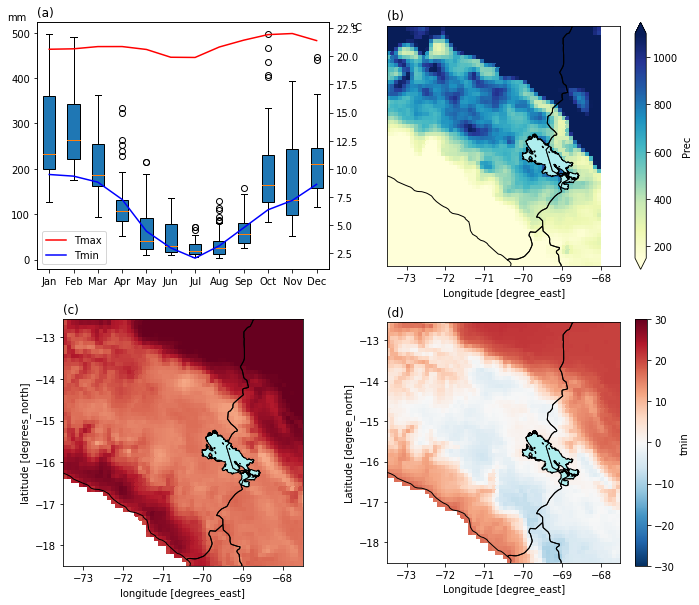

In [7]:
from mpl_toolkits.mplot3d import axes3d
fig, axs = plt.subplots(2, 2, figsize=(11.5, 10))

#DIAGRAMA CLIMATOLOGICO
x1 = pp_graph["Prec"][0][0].to_numpy()
x2 = pp_graph["Prec"][1][0].to_numpy()
x3 = pp_graph["Prec"][2][0].to_numpy()
x4 = pp_graph["Prec"][3][0].to_numpy()
x5 = pp_graph["Prec"][4][0].to_numpy()
x6 = pp_graph["Prec"][5][0].to_numpy()
x7 = pp_graph["Prec"][6][0].to_numpy()
x8 = pp_graph["Prec"][7][0].to_numpy()
x9 = pp_graph["Prec"][8][0].to_numpy()
x10 = pp_graph["Prec"][9][0].to_numpy()
x11 = pp_graph["Prec"][10][0].to_numpy()
x12 = pp_graph["Prec"][11][0].to_numpy()
all_x = [x1,x2,x3,x4,x5,x6,x7,x8,x9, x10, x11, x12]
meses = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
#diagrama de cajas de pp
axs[0, 0].boxplot(all_x, patch_artist=True, labels=meses)
axs[0, 0].set_ylabel("mm",rotation=0, ha='left', y=1)
#tmax y tmin
ax1=axs[0, 0].twinx()
x = np.arange(1,13)
ax1.plot(x,tmax_monthly["tx"].to_numpy(),label="Tmax", color="red")
ax1.plot(x,tmin_monthly["tmin"].to_numpy(),label="Tmin",color="blue")
ax1.set_ylabel("°C",rotation=0, ha='right', y=1)

axs[0, 0].set_title('(a)', loc='left')
plt.legend()

#DIAGRAMA 2
ax2 = axs[0, 1]
pp_anual.plot(ax=ax2, cmap ="YlGnBu", vmin=150, vmax=1100)
lugar = Sudamerica.plot(ax=ax2,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax2,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax2.set_xlim(minx, maxx)
ax2.set_ylim(miny, maxy)
ax2.set_ylabel("")
ax2.set_yticks([])
axs[0, 1].set_title('(b)', loc='left')

#DIAGRAMA 3
ax3 = axs[1, 0]
tmax_anual.plot(ax=ax3,cmap="RdBu_r",vmin=-30,vmax=30, add_colorbar=False)
lugar = Sudamerica.plot(ax=ax3,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax3,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax3.set_xlim(minx, maxx)
ax3.set_ylim(miny, maxy)
axs[1, 0].set_title('(c)', loc='left')


#DIAGRAMA 4
ax4 = axs[1, 1]
tmin_anual.plot(ax=ax4,cmap="RdBu_r", vmin=-30,vmax=30)
lugar = Sudamerica.plot(ax=ax4,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax4,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax4.set_xlim(minx, maxx)
ax4.set_ylim(miny, maxy)
axs[1, 1].set_title('(d)', loc='left')

fig.savefig("Figura2.png")